In [16]:
#imports
import pandas as pd  
import numpy as np
import matplotlib.pyplot as plt
import re

In [2]:
df = pd.read_csv(".\Raw_data\output_got.csv")
df.head()

,username,date,retweets,favorites,Sentiment,text,geo,mentions,hashtags,id,permalink,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17
0,stannabozny,28-04-19 14:37,0,0,NaN,The Big Five FAANG Stock and Sector Service is...,NaN,NaN,#AMZN #AAPL #FB #NFLX #TSLA #GOOGL #IBB #IYR #...,1.12257E+18,https://twitter.com/stannabozny/status/1122570...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,fine209,28-04-19 10:48,0,0,NaN,#Apple #ipad #ipadair #aapl https://www. ebay-...,NaN,NaN,#Apple #ipad #ipadair #aapl,1.12251E+18,https://twitter.com/fine209/status/11225128987...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,coolchandra,28-04-19 9:25,0,0,NaN,#xlu back in range.. Mild bullish bias. Best t...,NaN,NaN,#xlu #trading #DayTrading #options #stocks #Op...,1.12249E+18,https://twitter.com/coolchandra/status/1122491...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,it_tradingview,27-04-19 23:30,0,0,NaN,#AAPL - APPLE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,it_tradingview,27-04-19 23:20,0,0,NaN,#AAPL - POSSIBILE RITRACIAMENTO PER APPLE - Tr...,NaN,NaN,#AAPL,1.12234E+18,https://twitter.com/it_tradingview/status/1122...,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [22]:
random_text = df['text'][8]
print(random_text)
random_text = re.sub('http:// [A-Za-z0-9./]+','',random_text)
print(random_text)

Phil Schiller Lays Out Apple's Case for Cracking Down on Screen Time Monitoring Apps http:// bit.ly/2vswlFG #AAPL
Phil Schiller Lays Out Apple's Case for Cracking Down on Screen Time Monitoring Apps  #AAPL


In [23]:
df.drop(['username','retweets','favorites', 'geo', 'mentions', 'hashtags', 'id','permalink', 'Unnamed: 11', 'Unnamed: 12',
       'Unnamed: 13', 'Unnamed: 14', 'Unnamed: 15', 'Unnamed: 16','Unnamed: 17' ],axis=1,inplace=True)
df.head()

,date,Sentiment,text
0,28-04-19 14:37,NaN,The Big Five FAANG Stock and Sector Service is...
1,28-04-19 10:48,NaN,#Apple #ipad #ipadair #aapl https://www. ebay-...
2,28-04-19 9:25,NaN,#xlu back in range.. Mild bullish bias. Best t...
3,27-04-19 23:30,NaN,#AAPL - APPLE
4,27-04-19 23:20,NaN,#AAPL - POSSIBILE RITRACIAMENTO PER APPLE - Tr...


In [24]:
#get length of each string
df['pre_clean_len'] = [len(t) for t in df.text]

In [25]:
df.head()

,date,Sentiment,text,pre_clean_len
0,28-04-19 14:37,NaN,The Big Five FAANG Stock and Sector Service is...,190
1,28-04-19 10:48,NaN,#Apple #ipad #ipadair #aapl https://www. ebay-...,171
2,28-04-19 9:25,NaN,#xlu back in range.. Mild bullish bias. Best t...,231
3,27-04-19 23:30,NaN,#AAPL - APPLE,13
4,27-04-19 23:20,NaN,#AAPL - POSSIBILE RITRACIAMENTO PER APPLE - Tr...,109


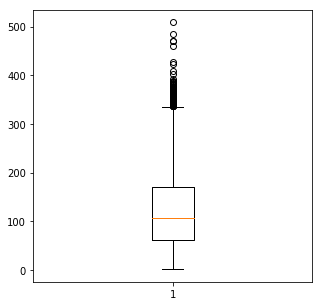

In [27]:
fig, ax = plt.subplots(figsize=(5, 5))
plt.boxplot(df.pre_clean_len)
plt.show()

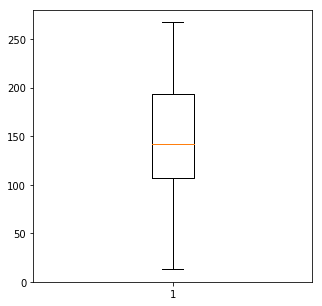

In [31]:
#data which have more than 140 chars
a = df[df.pre_clean_len < 280].head(10)
a
fig, ax = plt.subplots(figsize=(5, 5))
plt.boxplot(a.pre_clean_len)
plt.show()

In [16]:
#Cleaning the data
from bs4 import BeautifulSoup
import re
from nltk.tokenize import WordPunctTokenizer
tok = WordPunctTokenizer()
#only english characters
pat1 = r'@[A-Za-z0-9]+'
#removes links
pat2 = r'https?://[A-Za-z0-9./]+'
combined_pat = r'|'.join((pat1, pat2))
def tweet_cleaner(text):
    soup = BeautifulSoup(text, 'lxml')
    souped = soup.get_text()
    stripped = re.sub(combined_pat, '', souped)
    try:
        clean = stripped.decode("utf-8-sig").replace(u"\ufffd", "?")
    except:
        clean = stripped
    letters_only = re.sub("[^a-zA-Z]", " ", clean)
    lower_case = letters_only.lower()
    # During the letters_only process two lines above, it has created unnecessay white spaces,
    # tokenize and join together to remove unneccessary white spaces
    words = tok.tokenize(lower_case)
    return (" ".join(words)).strip()
testing = df.text[:100]
test_result = []
for t in testing:
    test_result.append(tweet_cleaner(t))
len(test_result)


100

In [18]:
clean_tweet_texts = []
for i in range(0,len(df)):
    if( (i+1)%1000 == 0 ):
        print ("Tweets %d of %d has been processed" % ( i+1, len(df)))
    clean_tweet_texts.append(tweet_cleaner(df['text'][i]))

Tweets 1000 of 10611 has been processed
Tweets 2000 of 10611 has been processed
Tweets 3000 of 10611 has been processed
Tweets 4000 of 10611 has been processed
Tweets 5000 of 10611 has been processed
Tweets 6000 of 10611 has been processed
Tweets 7000 of 10611 has been processed
Tweets 8000 of 10611 has been processed
Tweets 9000 of 10611 has been processed
Tweets 10000 of 10611 has been processed


In [21]:
clean_df = pd.DataFrame(clean_tweet_texts,columns=['text'])
clean_df['target'] = df.Sentiment
clean_df['date'] = df.date
clean_df.head()

,text,target,date
0,the big five faang stock and sector service is...,NaN,28-04-19 14:37
1,apple ipad ipadair aapl ebay kleinanzeigen de ...,NaN,28-04-19 10:48
2,xlu back in range mild bullish bias best to wa...,NaN,28-04-19 9:25
3,aapl apple,NaN,27-04-19 23:30
4,aapl possibile ritraciamento per apple trading...,NaN,27-04-19 23:20


In [23]:
#save df to csv
clean_df.to_csv(".\Cleaned_data\clean_aapl.csv")

In [32]:
#Referenced from: https://github.com/tthustla/twitter_sentiment_analysis_part1/blob/master/Capstone_part2.ipynb